IGNORING DATASET

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

IMPORTING DATASET

In [2]:
import pandas as pd
df=pd.read_csv('drug200.csv')

CHECKING DATASET

In [3]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
df.shape

(200, 6)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<Axes: title={'center': 'COUNTPLOT FOR DRUG'}, xlabel='Drug'>

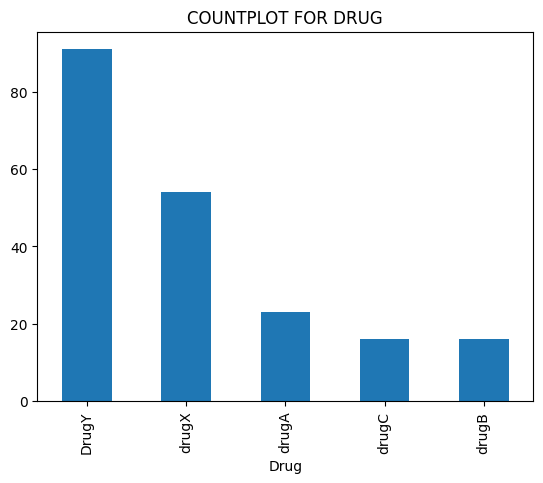

In [14]:
df['Drug'].value_counts().plot(kind='bar', title='COUNTPLOT FOR DRUG')


SEPERATING X AND Y FEATURES

In [15]:
x = df.drop(columns=['Drug'])
y = df[['Drug']]

In [16]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [17]:
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


SEPERATING CAT AND CON FEATURES

In [18]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [19]:
cat

['Sex', 'BP', 'Cholesterol']

In [20]:
con

['Age', 'Na_to_K']

CREATING PREPROCESSING PIPELINE

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])


In [23]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [24]:
x_pre = pre.fit_transform(x)
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [25]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [26]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


APPLYING TRAIN TEST SPLIT

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [28]:
xtrain.shape

(140, 9)

In [29]:
xtest.shape

(60, 9)

In [38]:
xtrain.value_counts()

num__Age   num__Na_to_K  cat__Sex_F  cat__Sex_M  cat__BP_HIGH  cat__BP_LOW  cat__BP_NORMAL  cat__Cholesterol_HIGH  cat__Cholesterol_NORMAL
-1.776354  -0.971497     0.0         1.0         0.0           0.0          1.0             1.0                    0.0                        1
 0.768653   0.422366     0.0         1.0         0.0           1.0          0.0             0.0                    1.0                        1
 0.647462  -0.708795     1.0         0.0         1.0           0.0          0.0             1.0                    0.0                        1
 0.708057  -0.987873     0.0         1.0         0.0           0.0          1.0             1.0                    0.0                        1
           -0.148419     0.0         1.0         0.0           1.0          0.0             1.0                    0.0                        1
                                                                                                                                             

In [39]:
xtest.value_counts()

num__Age   num__Na_to_K  cat__Sex_F  cat__Sex_M  cat__BP_HIGH  cat__BP_LOW  cat__BP_NORMAL  cat__Cholesterol_HIGH  cat__Cholesterol_NORMAL
-1.715759  -0.078892     1.0         0.0         1.0           0.0          0.0             0.0                    1.0                        1
            0.405574     0.0         1.0         1.0           0.0          0.0             0.0                    1.0                        1
-0.200874   0.946522     1.0         0.0         0.0           0.0          1.0             0.0                    1.0                        1
-0.140278  -0.460525     0.0         1.0         1.0           0.0          0.0             0.0                    1.0                        1
            1.829968     1.0         0.0         0.0           1.0          0.0             0.0                    1.0                        1
-0.079683   0.455672     0.0         1.0         0.0           1.0          0.0             0.0                    1.0                       

In [34]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [30]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
169,-1.473377,-0.669244,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.708057,1.292073,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,1.798775,-0.904468,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12,-0.079683,-0.098320,0.0,1.0,0.0,1.0,0.0,1.0,0.0
35,0.102103,-1.221155,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [31]:
ytrain.shape

(140, 1)

In [32]:
ytest.shape

(60, 1)

In [33]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [35]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [36]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [40]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

CREATING A RANDOM FOREST MODEL

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [42]:
model.score(xtrain, ytrain)

0.7214285714285714

In [43]:
model.score(xtest, ytest)

0.7333333333333333

HYPERPARAMETER TUNING WITH RANDOM SEARCH CV

In [44]:
params = {'n_estimators': [10,50,100,200],
          'max_depth': [2, 3, 4, 5,6, 7],
          'min_samples_split': [5,6,7,8,9],
          'criterion': ['gini', 'entropy']}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [46]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'max_depth': 6,
 'criterion': 'entropy'}

In [47]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=6,
                       n_estimators=50)

EVALUATING MODEL IN TRAIN AND TEST

In [48]:
best_rfc.score(xtrain, ytrain)

1.0

In [49]:
best_rfc.score(xtest, ytest)

1.0

PREDICTING RESULTS FOR TRAIN AND TEST

In [55]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [51]:
ypred_tr[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [52]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [56]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [57]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


CREATING CONFUSION MATRIX FOR TEST RESULTS

In [58]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

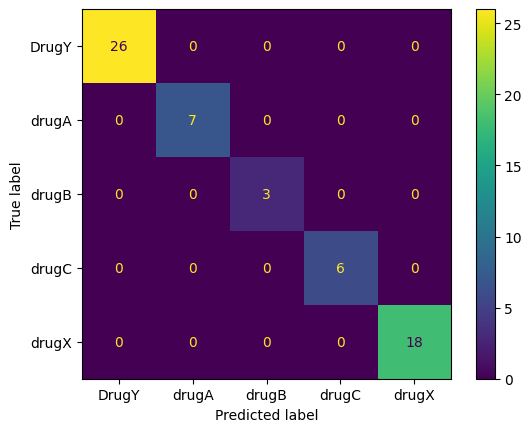

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

CREATING A CLASSIFICATION REPORT

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



PREDECTING PROBABILITIES 

In [63]:
ypred_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [64]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [65]:
yprob_ts[0:5]

array([[0.03666667, 0.002     , 0.        , 0.07571429, 0.88561905],
       [0.912     , 0.05      , 0.03      , 0.        , 0.008     ],
       [0.08395238, 0.0225    , 0.        , 0.        , 0.89354762],
       [0.21253968, 0.        , 0.052     , 0.4629127 , 0.27254762],
       [0.92666667, 0.        , 0.        , 0.        , 0.07333333]])

In [66]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

FEATURE IMPORTANCES

In [68]:
imp = best_rfc.feature_importances_
imp

array([0.12348224, 0.46957352, 0.00771685, 0.00835259, 0.14263461,
       0.09103972, 0.09795101, 0.03592487, 0.02332459])

In [69]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [70]:
imp = pd.Series(imp)
imp

0    0.123482
1    0.469574
2    0.007717
3    0.008353
4    0.142635
5    0.091040
6    0.097951
7    0.035925
8    0.023325
dtype: float64

In [71]:
imp.index = xtrain.columns
imp

num__Age                   0.123482
num__Na_to_K               0.469574
cat__Sex_F                 0.007717
cat__Sex_M                 0.008353
cat__BP_HIGH               0.142635
cat__BP_LOW                0.091040
cat__BP_NORMAL             0.097951
cat__Cholesterol_HIGH      0.035925
cat__Cholesterol_NORMAL    0.023325
dtype: float64

In [72]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.469574
cat__BP_HIGH               0.142635
num__Age                   0.123482
cat__BP_NORMAL             0.097951
cat__BP_LOW                0.091040
cat__Cholesterol_HIGH      0.035925
cat__Cholesterol_NORMAL    0.023325
cat__Sex_M                 0.008353
cat__Sex_F                 0.007717
dtype: float64

<Axes: title={'center': 'FEATURE IMPORTANCES'}>

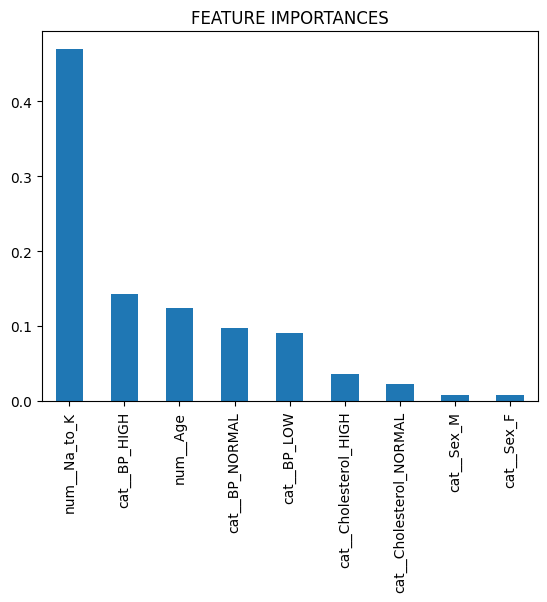

In [73]:
imp.plot(kind='bar', title='FEATURE IMPORTANCES')

PREDICTING OUT OF SAMPLE DATA

In [74]:
xnew = pd.read_csv('test_drugs.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006
5,49,M,HIGH,NORMAL,8.700
6,58,F,LOW,HIGH,26.645
7,28,F,LOW,HIGH,13.127
8,50,F,NORMAL,NORMAL,17.211
9,23,M,LOW,HIGH,7.298


In [75]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


APPLYING PRE.TRANSFORM

In [76]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [77]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.283889,-1.024787,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.829248,1.465543,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.988614,-0.410427,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.344485,0.156333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-1.291591,-1.219351,0.0,1.0,0.0,1.0,0.0,1.0,0.0


PREDICTING THE RESULTS WITH PROBABILITY

In [81]:
pred = best_rfc.predict(xnew_pre)
pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [82]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.86166667, 0.        , 0.        , 0.015     , 0.12333333],
       [0.02777778, 0.86330159, 0.09749206, 0.00285714, 0.00857143],
       [0.02861111, 0.8199411 , 0.11261445, 0.        , 0.03883333],
       [0.05555556, 0.00857143, 0.        , 0.01202381, 0.92384921],
       [0.0322619 , 0.        , 0.        , 0.9063961 , 0.06134199],
       [0.02861111, 0.7235919 , 0.16696366, 0.        , 0.08083333],
       [0.97253968, 0.        , 0.        , 0.02246032, 0.005     ],
       [0.16046825, 0.00857143, 0.        , 0.64012626, 0.19083405],
       [0.85128571, 0.        , 0.        , 0.        , 0.14871429],
       [0.0482619 , 0.        , 0.        , 0.81201587, 0.13972222],
       [0.04746032, 0.        , 0.02888889, 0.00333333, 0.92031746],
       [0.80383333, 0.01333333, 0.16866667, 0.        , 0.01416667],
       [0.95857143, 0.        , 0.        , 0.        , 0.04142857],
       [0.99666667, 0.00333333, 0.        , 0.        , 0.        ],
       [0.93137302, 0.06112698, 0.

In [83]:
import numpy as np 
prob_max = np.max(prob, axis=1)
prob_max

array([0.86166667, 0.86330159, 0.8199411 , 0.92384921, 0.9063961 ,
       0.7235919 , 0.97253968, 0.64012626, 0.85128571, 0.81201587,
       0.92031746, 0.80383333, 0.95857143, 0.99666667, 0.93137302,
       0.88271429, 0.992     , 0.81937302, 0.97277778, 0.93      ,
       0.93180952, 0.92666667, 0.99142857, 0.70075397, 0.912     ,
       0.92637302, 0.76568588, 0.82134921, 0.86840476, 0.92047619])

SAVING ABOVE PROBABILITIES AND PREDS IN XNEW

In [84]:
xnew['Drug_pred']=pred
xnew['Drug_prob']=prob_max

In [85]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.861667
1,35,F,HIGH,HIGH,12.894,drugA,0.863302
2,48,M,HIGH,NORMAL,10.446,drugA,0.819941
3,40,F,NORMAL,HIGH,10.103,drugX,0.923849
4,16,M,LOW,HIGH,12.006,drugC,0.906396
5,49,M,HIGH,NORMAL,8.700,drugA,0.723592
6,58,F,LOW,HIGH,26.645,DrugY,0.972540
7,28,F,LOW,HIGH,13.127,drugC,0.640126
8,50,F,NORMAL,NORMAL,17.211,DrugY,0.851286
9,23,M,LOW,HIGH,7.298,drugC,0.812016


In [86]:
xnew['Drug_pred'].value_counts()

Drug_pred
DrugY    16
drugA     5
drugC     4
drugX     3
drugB     2
Name: count, dtype: int64

<Axes: title={'center': 'COUNTPLOT FOR OUT OF SAMPLE PREDICTIONS'}, xlabel='Drug_pred'>

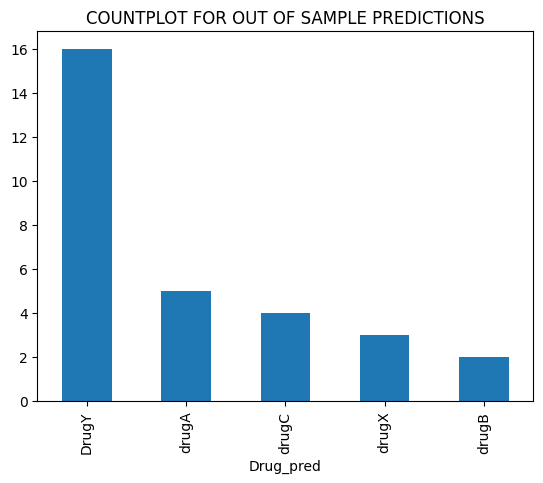

In [87]:
xnew['Drug_pred'].value_counts().plot(kind='bar', title='COUNTPLOT FOR OUT OF SAMPLE PREDICTIONS')


SAVING ABOVE RESULTS TO CSV

In [88]:
xnew.to_csv('RESULTS.csv', index=False)